<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Introduction to Regression

# Learning Objectives / Agenda

### How do we predict things?

### Introduction to Regression

### Simple & Multiple Linear Regression!

### Making Better Predictions

# How do we predict things?

We've seen statistics for **describing** data

and **inference**

but how do we predict the future?

Actually... **why** predict the future?

We'll talk about bike sharing data today (i.e. schemes like the Santander/Boris bikes)

What is the value of accurately predicting demand for these bikes?



Examples:

- Where should we put new bikeshare stations? How large should they be?

- Calculate the expected wear and tear on bikes and what the replacement costs will be

- Forecast full and empty stations and send a service vehicle to "rebalance" the bikes from one station to another

Value of predictions:

- accurate forecasting of budget, supply, demand ("how much?" questions) = **better financial management**

- accurate trend forecasting (i.e. "what will people want to buy?" type questions) = **staying ahead**

- generally **better responsiveness to change**

This is what machine learning does for us.

While "classical" statistics has methods to describe and understand the world,

machine learning focuses on **making better predictions**.

So what do we need in order to make predictions?

- data about the **past**, or just **existing examples**

- some examples of **answers** (what type of learning is this?)

- algorithms to map existing **inputs** to **outputs**: we'll be calling these **models**

- a way to measure how well our predictions are doing (in supervised learning)

Our predictions aren't always time series, but to our model everything is "the future".

We want it to do well **on data it hasn't seen before**.

We call this an ability to **generalise**.

How can we test how well our model performs on data it hasn't seen, when we can't collect more data?

Hide some of the data from the model!

### The prediction process

Step 1 - clean your data and figure out which column to predict

- the column you want to predict is the **target** (or sometimes "response" or "label")

- the columns you use to predict them are **features** (or sometimes "predictors")

Step 2 - **split** your data into a **training set** and a **test set**

- your model will only see the training data

- and will be evaluated on the test data

- there is no "true" answer to what the train-test split should be. Anything from 80-20 to 50-50 is fine.

Step 3 - choose an algorithm (e.g. linear regression)

- train your model on your training set

- this is where model "learns" associations between past combinations of features and targets

Step 4 - evaluate the performance of your model on data it hasn't seen before (the test set)

### Summary: the Predictive Process

Step 1 - **prepare** your data and **setup** the problem

Step 2 - **split** your data into training & test sets

Step 3 - **train** (or "fit") your model

Step 4 - **predict** outputs for unseen data and **evaluate**

# Introduction to Regression

### Predicting Bike Share 

To start with, we're going to predict the amount of bikes rented in a given hour based on what the temperature was at the time.

What is our feature and what is our target?

Feature: temperature (in Celsius)

Target: number of bikes rented in that hour

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

bikes = pd.read_csv("assets/data/bikeshare.csv")

bikes.rename(columns={"count": "total_rentals"}, inplace=True)

bikes.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,total_rentals
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1


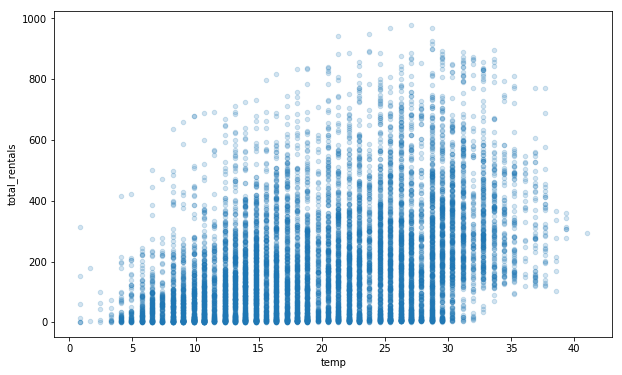

In [2]:
bikes.plot(kind='scatter', x='temp', y='total_rentals', alpha=0.2, figsize=(10, 6));

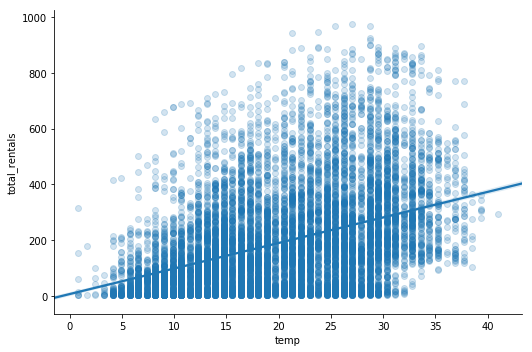

In [3]:
sns.lmplot(x='temp', y='total_rentals', data=bikes, aspect=1.5, scatter_kws={'alpha':0.2});

Equation of a straight line:

$$
y = mx + c
$$

$x$ = temperature (in Celsius)

$y$ = target (i.e. number of bikes)

What are $m$ and $c$?

$m$ = the **slope** of the line ("rise over run") - also called "coefficient" or "weight"

*"for each additional Celsius increase in temperature, how many additional bikes will people rent?"*

$c$ = the **y-intercept** of the line

*"if the temperature is zero, how many bikes do expect people to rent?"*

(our data doesn't contain negative temperatures, but our model can extrapolate below 0 too)

Our regression models will take the form:

$$y = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n + \epsilon$$

By convention our coefficients (or "weights") are values of $\beta$ going from $\beta_0$ (the intercept) to $\beta_n$ (our nth coefficient)

$x$ is our **feature vector** where $x_1$ is the first feature (in this case our only one, temperature)

($x_0$ is a constant feature that's always equal to 1 to make the maths work out)

$\epsilon$ is the "irreducible error". Long story short: we assume it's Gaussian and it sort of goes away.

Our final model for predicting bike sharing using temperature will then say:

- For each prediction I will take the temperature ($x_1$) and multiply it by $\beta_1$

- I will then add $\beta_0$

- That answer is my prediction for the number of bike rentals

What are the values of $\beta_0$ and $\beta_1$?

That's what we want to "learn"!

In the case of linear regression, the combination of values of $\beta_0$ and $\beta_1$ **is** our model

Let's see this in action...

## Introducing scikit-learn

Remember our predictive framework:

Step 1 - **prepare** your data and **setup** the problem

Step 2 - **split** your data into training & test sets

Step 3 - **train** (or "fit") your model

Step 4 - **predict** outputs for unseen data and **evaluate**

Step 1 - prepare the data

Done for us this time!

Step 2 - split your data into training and test sets

In [4]:
from sklearn.model_selection import train_test_split

X = bikes["temp"]
y = bikes["total_rentals"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(len(X_train), len(X_test))
print(len(y_train), len(y_test))

7620 3266
7620 3266


Step 3 - **train** your model

In `scikit-learn` the function to use (for almost all models) is `.fit()`

In [5]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train.values.reshape(-1, 1), y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

```python
X_train.values.reshape(-1, 1)
```

Note: `scikit-learn` models expect 2-dimensional inputs for X, so if you use 1 feature you need to make it an "N-by-1" array rather than a single series.

Using `-1` is just a shorthand for "N" so you don't have to do `len(X_train)`.

This is just a quirk of the implementations, but worth knowing for single-feature models.

What are the values of $\beta$?

In [6]:
print(model.intercept_, model.coef_)

7.94694450075 [ 9.05687845]


What's the interpretation?

*"You'll get 8 bike rentals on average when it's 0 degrees, and for each degree in Celsius you'll get an extra 9 bikes"*

(note we don't get p-values because in machine learning we care about **prediction** not **inference**... just be aware!)

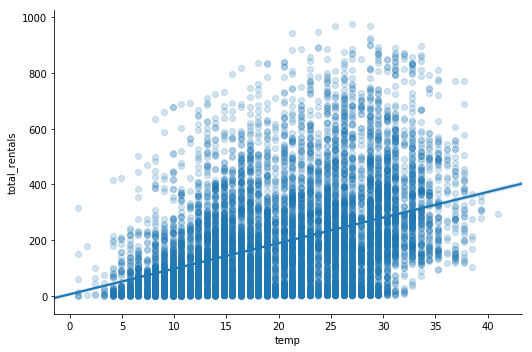

In [7]:
sns.lmplot(x='temp', y='total_rentals', data=bikes, aspect=1.5, scatter_kws={'alpha':0.2});

Step 4 - predict outputs for unseen data

In `scikit-learn` this will use the `.predict()` function

In [8]:
y_pred = model.predict(X_test.values.reshape(-1, 1))
y_pred

array([ 312.43919791,   45.08014614,   97.06662842, ...,  178.75967202,
        312.43919791,   89.6399881 ])

We have our first predictions!

In `scikit-learn` you'll almost always use the `.fit()` and `.predict()` functions - regardless of what algorithm you use!

### Evaluating machine learning models

We have our model's predictions... now what?

How do we measure how well it's done?

![](assets/images/residuals.png)

We measure the distance between our individual predictions and the true values in our test set

Why do we square the difference?

The model tries to find the best values of $\beta_0$ to $\beta_n$ that minimises this error (this method is called "least squares")

This error is also referred to as the "cost function" or "loss function" in machine learning

### Gradient Descent

In our case $w$ is a 1-D representation of $\beta_0$ and $\beta_1$ i.e. the intercept and the **weight** associated with temperature

<img src="assets/images/gradient_descent.png" style="width:70%" />

When we evaluate our model we can use various metrics

**Mean absolute error (MAE)** is the average absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean squared error (MSE)** is the same as the squared errors just "per sample" to get a sense of the average:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root mean squared error (RMSE)** is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

**R-squared** is a statistical measure of how close the data are to the fitted regression line. It is also known as the coefficient of determination, or the coefficient of multiple determination for multiple regression.

$$R^2 = \frac{Explained}{Total}$$

R-squared is always between 0 and 100%.



In [9]:
from sklearn import metrics
import numpy as np

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R^2:', metrics.r2_score(y_test, y_pred))

MAE: 124.861344083
MSE: 27242.2620186
RMSE: 165.052300858
R^2: 0.162814538348


Why use one or the other?

Why use one or the other?

- MAE is the easiest to understand, because it's the average error.

- MSE is more popular than MAE, because MSE "punishes" larger errors (because it squares them), which tends to be useful in the real world
    - Also, MSE is differentiable, making it easier to use than MAE for optimisation

- RMSE is even more popular than MSE, because RMSE is interpretable in the "y" units

- R-squared cannot determine whether the coefficient estimates and predictions are biased, which is why you must assess the residual plots.

- R-squared does not indicate whether a regression model is adequate. You can have a low R-squared value for a good model, or a high R-squared value for a model that does not fit the data!

### Benchmarking

How do we know those error numbers are "good"?

It's a good idea to test your model against "dumb" models

One example is a model that always predicts the mean value

In [10]:
y_pred_mean = [y_train.mean()] * len(y_test)

print('RMSE (model):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('RMSE: (dumb model):', np.sqrt(metrics.mean_squared_error(y_test, y_pred_mean)))

RMSE (model): 165.052300858
RMSE: (dumb model): 180.390566678
